In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)
data = pd.read_csv('/content/gdrive/MyDrive/csgo_round_snapshots.csv')

Mounted at /content/gdrive/


Neki bitniji podaci i njihove predstave

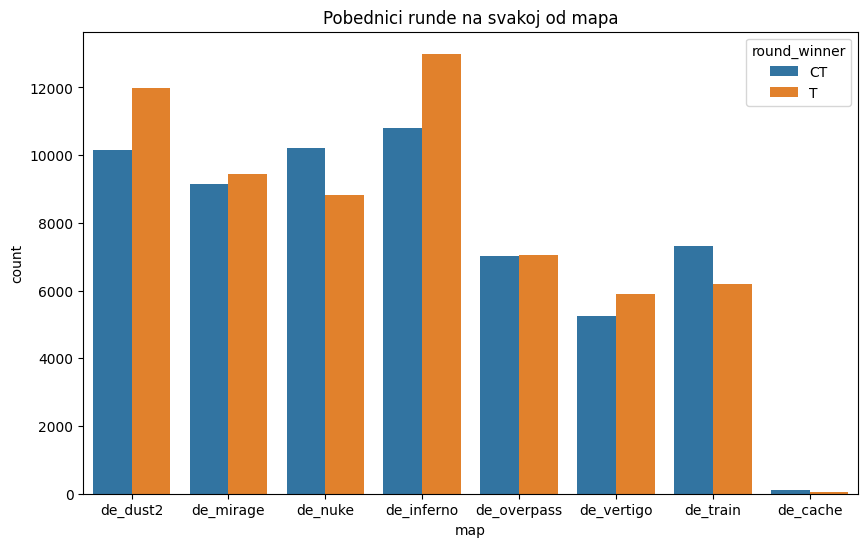

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="map", hue="round_winner", data=data)
ax.set(title='Pobednici runde na svakoj od mapa')
plt.show()


Bomba je postavljena u 11.18% slucajeva.


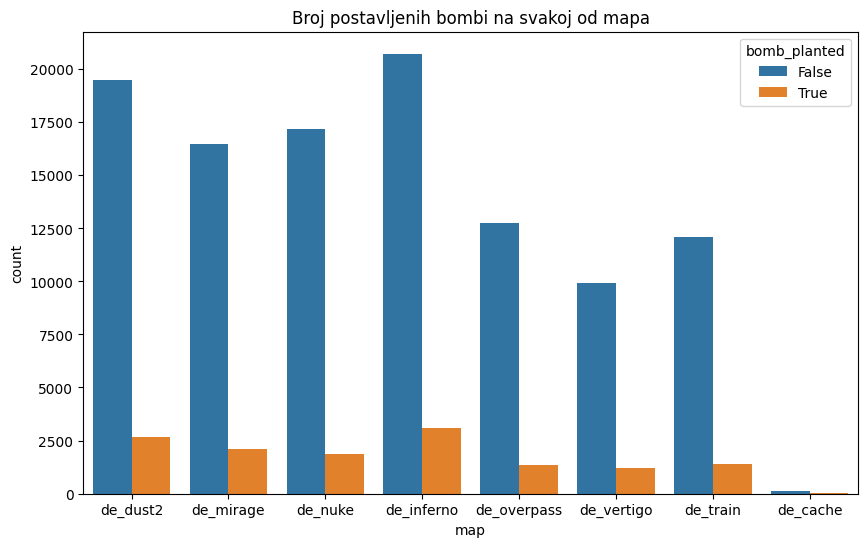

In [ ]:
# Broj postavljenih bombi od strane T tima na svakoj od mapa
postavljenaBomba=0
for i in data["bomb_planted"]:
  if i==True:
    postavljenaBomba+=1
procenatPostavljenihBombi = round(postavljenaBomba/len(data["bomb_planted"])*100, 2)
print(f"Bomba je postavljena u {procenatPostavljenihBombi}% slucajeva.")

plt.figure(figsize=(10,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=data)
ax.set(title='Broj postavljenih bombi na svakoj od mapa')
plt.show()

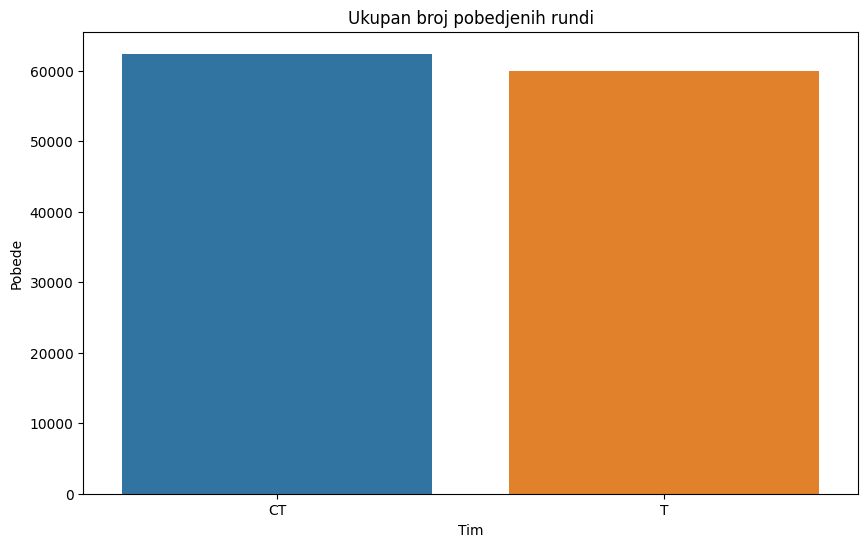

In [ ]:
# Ukupno pobeda
plt.figure(figsize=(10,6))
ax = sns.barplot(x=data['round_winner'].unique(), y=data['round_winner'].value_counts())
ax.set(title='Ukupan broj pobedjenih rundi', xlabel='Tim', ylabel='Pobede')
plt.show()

<Axes: xlabel='time_left', ylabel='Density'>

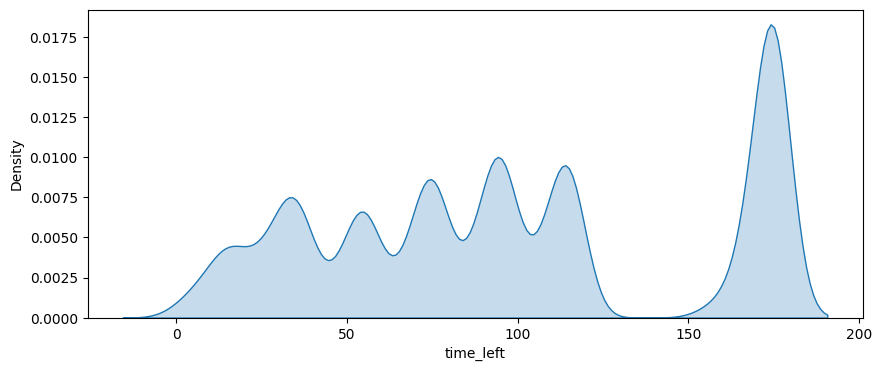

In [ ]:
# Gustina raspodele prema preostalom vremenu
fig, (ax3) = plt.subplots(ncols=1, sharey=True, figsize=(10,4))
sns.kdeplot(data['time_left'], fill=True, ax=ax3)

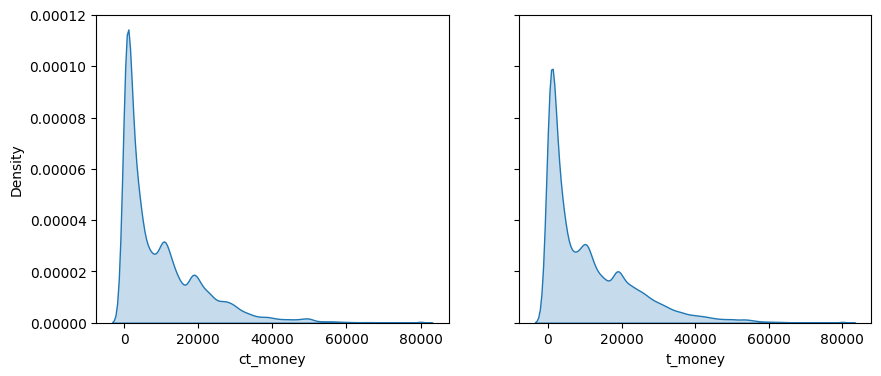

In [ ]:
# Distribucija para po timu ($)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.kdeplot(data['ct_money'], fill=True, ax=ax1);
sns.kdeplot(data['t_money'], fill=True, ax=ax2);

<Axes: xlabel='t_score', ylabel='Density'>

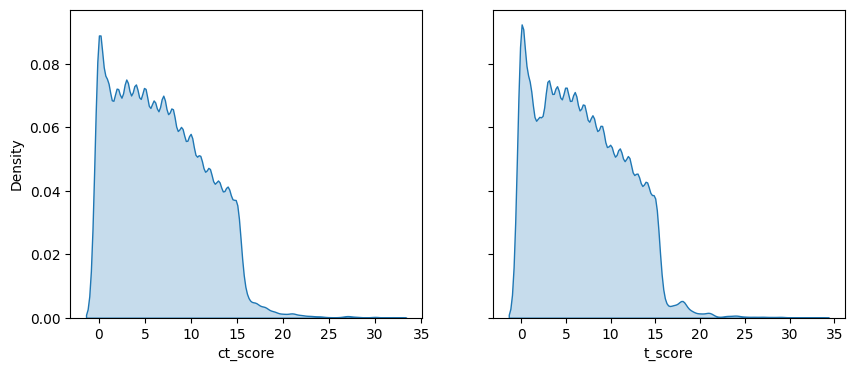

In [ ]:
# Distribucija poena osvojenih rundi
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.kdeplot(data['ct_score'], fill=True, ax=ax1)
sns.kdeplot(data['t_score'], fill=True, ax=ax2)

Sve problematicne kolone koje moramo prebaciti u INT

In [ ]:
data.drop(data.select_dtypes(np.number), axis=1)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [ ]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [ ]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
mapa_mapa = {index: label for index, label in enumerate(encoder.classes_)}

data['round_winner'] = encoder.fit_transform(data['round_winner'])
mapa_pobednika = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
print(mapa_mapa)
print(mapa_pobednika)

{0: 'de_cache', 1: 'de_dust2', 2: 'de_inferno', 3: 'de_mirage', 4: 'de_nuke', 5: 'de_overpass', 6: 'de_train', 7: 'de_vertigo'}
{0: 'CT', 1: 'T'}


In [ ]:
y = data['round_winner']
X = data.drop('round_winner', axis=1)

In [ ]:
# Skaliranje svake promenljive u tabeli uz pomoc RobustScalera
scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,...,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,...,0.000000,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
122407,0.178754,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,1.000000,1.000000,0.666667,1.333333,0.5,0.0,0.0,2.0,0.0,0.0
122408,0.000179,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,0.000000,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.5,0.0,0.0


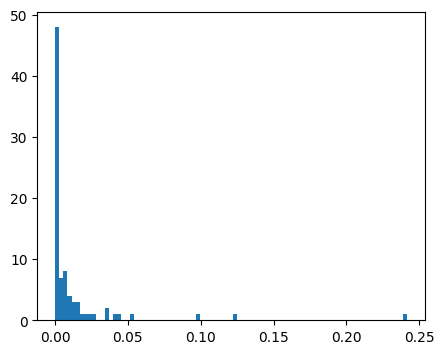

In [ ]:
# Ne uzimamo zadnjih 10 kolona od mogucih 95 jer skoro nebitne za treniranje mreze (kolicina granata koju poseduje svaki od clanova tima)
pca = PCA(n_components=85)
pca.fit(X)

plt.figure(figsize=(5, 4))
plt.hist(pca.explained_variance_ratio_, bins=85)
plt.show()

Funkcija `uzmiKParametara` kao argumente prima PCA model i razliku zeljene varijanse od 100%. Na primer, ako zelimo da nas 'skraceni' model zadrzi 95% odlika originala, unecemo 0.05 ; Isto tako ako zelimo 90% unecemo 0.1 za alfu itd...

In [ ]:
def uzmiKParametara(pca, alpha):
    ukupnaVarijabilnost = 0
    
    for odlika, varijabilnost in enumerate(pca.explained_variance_ratio_):
        ukupnaVarijabilnost += varijabilnost
        if (ukupnaVarijabilnost >= 1 - alpha):
            return odlika + 1
    return len(pca.explained_variance_ratio_)

In [ ]:
K = uzmiKParametara(pca, 0.05)
X = pca.transform(X)[:, 0:K]
X.shape

(122410, 33)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.807650,-3.041170,-0.477923,-0.788150,-0.837791,0.305314,-0.571604,-0.640431,0.391012,-0.089662,...,-0.406736,-0.220961,0.062492,-0.033852,-0.065296,0.007777,-0.080869,-0.049944,-0.165961,0.056775
1,0.403354,-2.516566,-0.271932,-1.210600,-0.940974,0.463845,-0.769151,-0.302018,-0.226065,-0.320548,...,-0.424848,0.001105,0.020463,0.051323,0.030929,-0.023390,0.045672,-0.006290,0.185634,0.072155
2,1.793312,-1.452247,-0.282613,-1.090443,-0.785376,0.333237,-0.704440,-0.376257,0.147196,-0.330615,...,0.156083,0.008170,-0.026589,0.010115,0.146338,-0.054307,0.084381,-0.020325,0.149910,0.107855
3,1.953921,-1.452769,-0.437852,-1.067899,-0.855280,0.367944,-0.569773,-0.317184,0.120949,-0.332918,...,0.102953,0.022223,0.006126,0.070663,0.069446,-0.048108,0.049091,-0.094075,0.219295,-0.199274
4,0.531003,-3.044842,-0.766788,-0.128865,-0.392524,0.306517,-0.459914,-0.600220,0.627068,-0.421338,...,-0.332748,-0.130514,-0.103789,0.085502,-0.007072,-0.034536,0.101459,-0.186271,0.057514,-0.024417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,2.662008,1.291910,1.542080,0.772222,-0.739458,-0.647647,0.687017,-0.644861,-1.184389,0.700592,...,0.002813,0.159939,0.097054,-0.472091,-0.097370,-0.511502,-0.017211,-0.110692,-0.203674,0.171138
122406,-0.110277,-2.209320,0.228796,1.364919,-0.437793,-0.861938,-0.019721,0.045146,-0.401692,0.860939,...,0.229384,0.662024,0.323117,-0.426443,-0.007367,-0.088607,0.094928,0.059359,-0.130469,0.205325
122407,-2.375611,0.942436,1.160162,-0.669273,1.450319,1.070238,0.582792,0.596464,-1.143166,1.541248,...,0.833349,0.424366,-0.131201,0.113948,-0.116364,-0.103917,0.191911,-0.500739,-0.255426,0.079432
122408,-1.905041,0.618990,1.723658,-0.066840,0.992627,1.524162,0.628238,0.485320,-1.258091,1.679712,...,0.700360,0.455182,-0.235973,0.224711,-0.127013,-0.221656,0.129971,-0.494348,-0.006301,-0.281792


In [ ]:
X_trenirajuci, X_testirajuci, y_trenirajuci, y_testirajuci = train_test_split(X, y, train_size=0.8)

In [ ]:
model_log_regr = LogisticRegression()
model_neur_mrez = MLPClassifier(
    solver='adam',
    shuffle=True,
    verbose=True
                         )

model_log_regr.fit(X_trenirajuci, y_trenirajuci)
model_neur_mrez.fit(X_trenirajuci, y_trenirajuci)

Iteration 1, loss = 0.48819170
Iteration 2, loss = 0.45850676
Iteration 3, loss = 0.45250682
Iteration 4, loss = 0.44853414
Iteration 5, loss = 0.44565647
Iteration 6, loss = 0.44339741
Iteration 7, loss = 0.44162537
Iteration 8, loss = 0.43935457
Iteration 9, loss = 0.43801542
Iteration 10, loss = 0.43600469
Iteration 11, loss = 0.43475209
Iteration 12, loss = 0.43332701
Iteration 13, loss = 0.43179648
Iteration 14, loss = 0.43076927
Iteration 15, loss = 0.42951541
Iteration 16, loss = 0.42867636
Iteration 17, loss = 0.42746870
Iteration 18, loss = 0.42621720
Iteration 19, loss = 0.42543091
Iteration 20, loss = 0.42392661
Iteration 21, loss = 0.42345327
Iteration 22, loss = 0.42224761
Iteration 23, loss = 0.42154478
Iteration 24, loss = 0.42061249
Iteration 25, loss = 0.41956697
Iteration 26, loss = 0.41880648
Iteration 27, loss = 0.41847584
Iteration 28, loss = 0.41722481
Iteration 29, loss = 0.41653875
Iteration 30, loss = 0.41566706
Iteration 31, loss = 0.41494223
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [ ]:
print(f"Model logističke regresije:              {round(model_log_regr.score(X_testirajuci, y_testirajuci)*100,2)}%")
print(f"MLP Klasifikator/Model neuronske moreže: {round(model_neur_mrez.score(X_testirajuci, y_testirajuci)*100,2)}%")

Model logističke regresije:              74.91%
MLP Klasifikator/Model neuronske moreže: 77.68%


Kao što vidimo, neuronska mreža ima bolju tačnost od modela logističke regresije za ~4%



---

Nasumično uzimanje 10 primera iz testirajućeg skupa i poređenje sa njihovim pravim vrednostima. 

In [ ]:
def koJePobedio(x, i):
  pobednikRunde = model_neur_mrez.predict(x)
  if(pobednikRunde==1):
    if(pobednikRunde==y_testirajuci.iloc[i]):
      print(f"Team T  je pobedio rundu {i}.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)")
    else:
      print(f"Team T  je pobedio rundu {i}.    (NETACNO - taj odgovor NIJE kao u testirajucem skupu.)")
  else:
    if(pobednikRunde==y_testirajuci.iloc[i]):
      print(f"Team CT je pobedio rundu {i}.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)")
    else:
      print(f"Team CT je pobedio rundu {i}.    (NETACNO - taj odgovor NIJE kao u testirajucem skupu.)")

brojac=0
while(brojac<=10):
  indeks = random.randint(10000,20000)
  koJePobedio(X_testirajuci[indeks].reshape(1,-1), indeks)
  brojac+=1


Team T  je pobedio rundu 15092.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team T  je pobedio rundu 14420.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team T  je pobedio rundu 13285.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team T  je pobedio rundu 19890.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team CT je pobedio rundu 10042.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team CT je pobedio rundu 16024.    (NETACNO - taj odgovor NIJE kao u testirajucem skupu.)
Team T  je pobedio rundu 14747.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team CT je pobedio rundu 14578.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team T  je pobedio rundu 15133.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team T  je pobedio rundu 12990.    (TACNO   - taj odgovor je kao i u testirajucem skupu.)
Team CT je pobedio rundu 19268.    (NETACNO - taj odgovor NIJE kao u testirajucem skupu.)
